# Linear Regression From Scratch

This section implements a simple linear regression model using **gradient descent** to find the best-fitting line for the dataset.

- **Loss function**: Mean Squared Error (MSE) computed by `loss_fun(m, c, df)`
- **Parameters**: Slope (`m`) and Intercept (`c`)
- **Optimization**: Gradient Descent implemented in `gradient_descent(c_now, m_now, df, L)`
- **Training**: Initialized with random `m` and `c`, learning rate `L = 0.01`, and trained for `epochs = 5000`
- Prints loss every 500 epochs to monitor progress
- Final regression line plotted against the data points

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("Salary_Data.csv")
df.sample(4)

,YearsExperience,Salary
24,8.7,109431.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [23]:
df.shape

(30, 2)

In [24]:
def loss_fun(m , c , points):
    total_error = 0
    for loc in range(len(points)):
        x = points.iloc[loc,:]['YearsExperience']
        y = points.iloc[loc,:]['Salary']
        total_error += (y - (c + m * x)) ** 2
    return total_error /  float(len(points))

In [25]:
def gradient_descent(c_now , m_now, df , L):
    dE_dm = 0
    dE_dc = 0

    n = df.shape[0]

    for loc in range(n):
        x = df.iloc[loc, :]['YearsExperience']
        y = df.iloc[loc, : ]['Salary']

        dE_dm += -(2 / n) * (y  - (c_now + m_now * x)) * x
        dE_dc += -(2 / n) * (y  - (c_now + m_now * x))

    c_now = c_now - L * dE_dc
    m_now = m_now - L * dE_dm

    return c_now, m_now

In [26]:
m , c = np.random.rand(), np.random.rand()
L = 0.01
epochs = 5000 
for x in range(epochs):
    c , m  = gradient_descent(c , m , df , L)
    if x % 500 == 0:
        print(f"Epoch {x}, Loss: {loss_fun(m, c, df):.2f}, c: {c:.2f}, m: {m:.2f}")

Epoch 0, Loss: 595403646.04, c: 1520.78, m: 9548.12
Epoch 500, Loss: 33030668.16, c: 22939.13, m: 9873.35
Epoch 1000, Loss: 31296319.07, c: 25449.65, m: 9500.80
Epoch 1500, Loss: 31271317.41, c: 25751.07, m: 9456.07
Epoch 2000, Loss: 31270956.99, c: 25787.26, m: 9450.70
Epoch 2500, Loss: 31270951.80, c: 25791.61, m: 9450.05
Epoch 3000, Loss: 31270951.72, c: 25792.13, m: 9449.97
Epoch 3500, Loss: 31270951.72, c: 25792.19, m: 9449.96
Epoch 4000, Loss: 31270951.72, c: 25792.20, m: 9449.96
Epoch 4500, Loss: 31270951.72, c: 25792.20, m: 9449.96


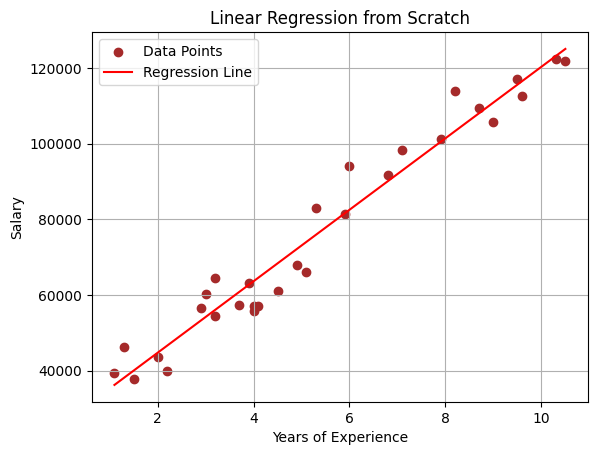

In [27]:
plt.scatter(df['YearsExperience'], df['Salary'], color='brown', label='Data Points')
plt.plot(df['YearsExperience'], c + m * df['YearsExperience'], color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression from Scratch')
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression Using Scikit-learn

Here, we compare our scratch implementation with the built-in `LinearRegression` model from **scikit-learn**.

- We train the model on the same dataset.
- We compare the learned parameters (intercept and slope).
- We plot both regression lines for visual comparison.
- We calculate and print the final loss for both models.

Sklearn Model Parameters -> Intercept: 25792.20, Slope: 9449.96
Sklearn Model Loss (MSE): 31270951.72


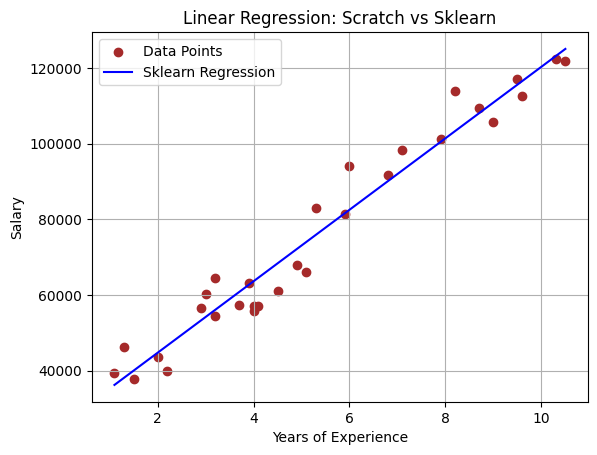

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

model = LinearRegression()
model.fit(X, y)

m_sklearn = model.coef_[0]
c_sklearn = model.intercept_

y_pred_sklearn = model.predict(X)

loss_sklearn = mean_squared_error(y, y_pred_sklearn)

print(f"Sklearn Model Parameters -> Intercept: {c_sklearn:.2f}, Slope: {m_sklearn:.2f}")
print(f"Sklearn Model Loss (MSE): {loss_sklearn:.2f}")

plt.scatter(df['YearsExperience'], df['Salary'], color='brown', label='Data Points')
plt.plot(df['YearsExperience'], y_pred_sklearn, color='blue', label='Sklearn Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Scratch vs Sklearn')
plt.legend()
plt.grid(True)
plt.show()

# Comparison of Linear Regression Scratch vs Sklearn

This section compares a linear regression model built from scratch using gradient descent with the LinearRegression model from scikit-learn.

Both models use the same dataset (YearsExperience vs Salary).

We compare the slope (m) and intercept (c) from both models.

A combined plot shows the scratch model’s line in red and sklearn’s line in blue dashed, with the data points.

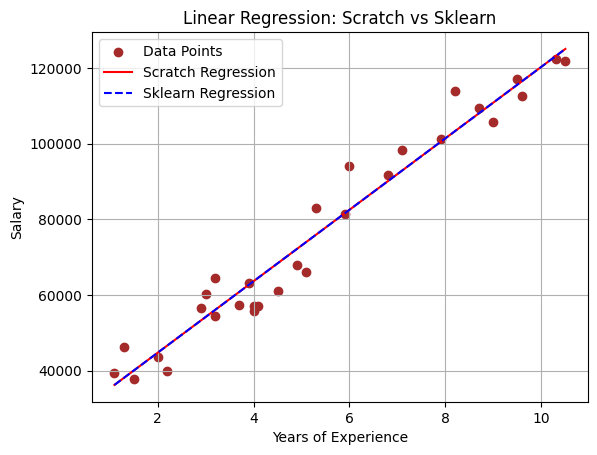

In [29]:
plt.scatter(df['YearsExperience'], df['Salary'], color='brown', label='Data Points')
plt.plot(df['YearsExperience'], c + m * df['YearsExperience'], color='red', label='Scratch Regression')
plt.plot(df['YearsExperience'], y_pred_sklearn, color='blue', linestyle='--', label='Sklearn Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Scratch vs Sklearn')
plt.legend()
plt.grid(True)
plt.show()